In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()
print(X_train.shape) # Loading CIFAR-10 data.

170508288/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)


In [8]:
acc = []

for k in range(1, 151):
  print("k: ", k)
  acc = []
  for f in range(5):
    # divide data into folds
    validationX, validationY = X_train[f*10000:(f+1)*10000], Y_train[f*10000:(f+1)*10000]
    trainX = np.concatenate((X_train[:f*10000], X_train[(f+1)*10000:]), axis = 0)
    trainY = np.concatenate((Y_train[:f*10000], Y_train[(f+1)*10000:]), axis = 0)
    cl1 = cl2 = 0         # c for correct, l1 for manhattan, l2 for euclidean

    for i in range(len(validationX)):
      l1_distance = []
      l2_distance = []

      for j in range(len(trainX)):
        #calculating distance between two images for L1
        l1 = np.sum(np.absolute(np.subtract(validationX[i], trainX[j])))

        #calculating distance between two images for L2
        l2 = np.sqrt(np.sum((validationX[i] - trainX[j])**2))

        l1_distance.append([l1, trainY[j][0]])
        l2_distance.append([l2, trainY[j][0]])
        
        if j == 400:
            break

      l1_distance = np.array(man_distance)
      l1_distance = l1_distance[l1_distance[:, 0].argsort()]
      l2_distance = np.array(l2_distance)
      l2_distance = l2_distance[l2_distance[:, 0].argsort()]
      
      # for L1(manhattan) distance
      values = l1_distance[:k, 1]
      # print(values)
      most_frequent_value = np.argmax(np.bincount(values.astype('int32')))
      # print(most_frequent_value)
      if most_frequent_value == validationY[i]:
        cl1 += 1
      # for L2(euclidean) distance
      values = l2_distance[:k, 1]
      most_frequent_value = np.argmax(np.bincount(values.astype('int32')))
      if most_frequent_value == validationY[i]:
        cl2 += 1

      if i == 150:
        break
# storing the accuracy then printing it
    acc.append([cl1/100, cl2/100])
  acc.append([acc, k])

print(acc)

k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9
k:  10
k:  11
k:  12
k:  13
k:  14
k:  15
k:  16
k:  17
k:  18
k:  19
k:  20
k:  21
k:  22
k:  23
k:  24
k:  25
k:  26
k:  27
k:  28
k:  29
k:  30
k:  31
k:  32
k:  33
k:  34
k:  35
k:  36
k:  37
k:  38
k:  39
k:  40
k:  41
k:  42
k:  43
k:  44
k:  45
k:  46
k:  47
k:  48
k:  49
k:  50
k:  51
k:  52
k:  53
k:  54
k:  55
k:  56
k:  57
k:  58
k:  59
k:  60
k:  61
k:  62
k:  63
k:  64
k:  65
k:  66
k:  67
k:  68
k:  69
k:  70
k:  71
k:  72
k:  73
k:  74
k:  75
k:  76
k:  77
k:  78
k:  79
k:  80
k:  81
k:  82
k:  83
k:  84
k:  85
k:  86
k:  87
k:  88
k:  89
k:  90
k:  91
k:  92
k:  93
k:  94
k:  95
k:  96
k:  97
k:  98
k:  99
k:  100
k:  101
k:  102
k:  103
k:  104
k:  105
k:  106
k:  107
k:  108
k:  109
k:  110
k:  111
k:  112
k:  113
k:  114
k:  115
k:  116
k:  117
k:  118
k:  119
k:  120
k:  121
k:  122
k:  123
k:  124
k:  125
k:  126
k:  127
k:  128
k:  129
k:  130
k:  131
k:  132
k:  133
k:  134
k:  135
k:  136
k:  137
k:  138
k:  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


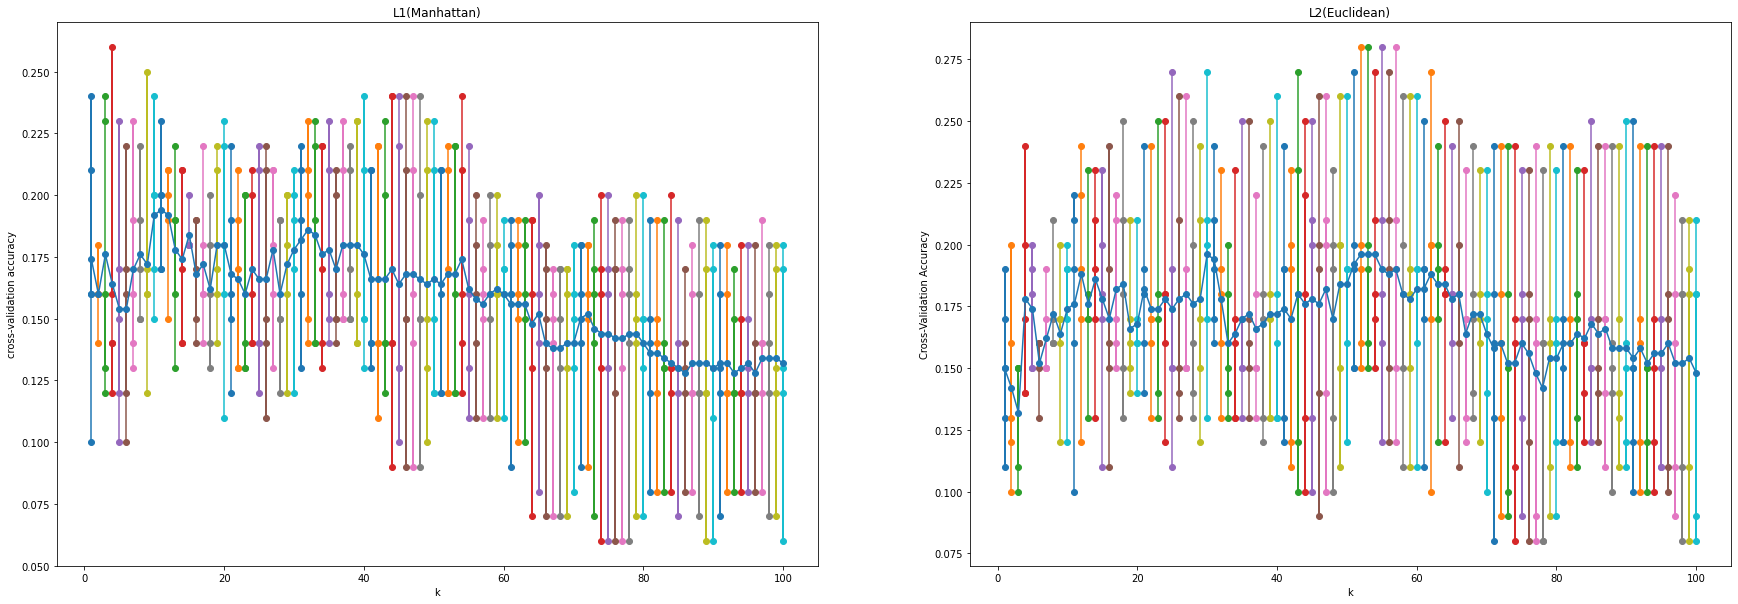

In [9]:
ag1 = []
ag2 = []
k = np.array(accuracy)[:,1]
#plotting the cross-validation for L1(Manhattan)
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.title('L1(Manhattan)')
for i in range(len(accuracy)):
  a = np.full((5), i+1, dtype=int)
  l1 = np.array(accuracy[i][0])[:,0]
  ag1.append(np.average(l1))
  plt.plot(a, l1, 'o-')
  
plt.plot(k, ag1, 'o-')
plt.xlabel('k')
plt.ylabel('cross-validation accuracy')

#plotting the cross-validation for L2(Euclidian)
plt.subplot(1,2,2)
plt.title('L2(Euclidean)')
for i in range(len(accuracy)):
  a = np.full((5), i+1, dtype=int)
  l2 = np.array(accuracy[i][0])[:,1]
  ag2.append(np.average(l2))
  plt.plot(a, l2, 'o-')

plt.plot(k, ag2, 'o-')
plt.xlabel('k')
plt.ylabel('Cross-Validation Accuracy')

plt.show()